# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Segmentação de Clientes (Clusterização)</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">


Neste projeto, estudaremos um caso prático utilizando técnicas de agrupamento não supervisionado considerando registros de clientes de um supermercado. A segmentação de clientes é a prática de separar os clientes em grupos que possuem características semelhantes em cada cluster. Iremos dividir os clientes em segmentos para otimizar a importância de cada cliente para o negócio. O resultado da clusterização também ajuda a empresa a atender às preocupações de diferentes tipos de clientes.

Link interessante sobre clusterização: conceitos básicos, principais algoritmos e aplicações.  
https://medium.com/turing-talks/clustering-conceitos-b%C3%A1sicos-principais-algoritmos-e-aplica%C3%A7%C3%A3o-ace572a062a9

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONTEÚDO DO PROJETO</p>   
    
* [1. IMPORTANDO BIBLIOTECAS](#1)
    
* [2. CARREGANDO DADOS](#2)
    
* [3. LIMPEZA DOS DADOS](#3)
    
* [4. PRÉ-PROCESSAMENTO DOS DADOS](#4)   
    
* [5. REDUÇÃO DE DIMENSIONALIDADE](#5) 
      
* [6. CLUSTERIZAÇÃO](#6)
    
* [7. AVALIAÇÃO DOS MODELOS](#7)
    
* [8. ANÁLISE DOS RESULTADOS E TOMADA DE DECISÃO](#8)
    
* [9. CONCLUSÃO](#9)
    
* [10. FIM](#10)


<a id="1"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">1. Importando Bibliotecas</p>

In [93]:
# Importando as bibliotecas de manipulação de dados, machine learning e visualização de dados

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import sklearn.metrics._classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">2. Carregando o Dataset</p>

In [96]:
# Carregando o dataset
data = pd.read_csv("campanha_marketing.csv", sep="\t")
print("Número de registros no dataset:", len(data))
data.head()

Número de registros no dataset: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [97]:
print("Dimensão do dataset:", data.shape)

Dimensão do dataset: (2240, 29)


<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true">


<a id="3"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">3. Limpeza dos Dados</p>


**Nesta seção, temos:** 
* Limpeza de dados
* Feature Engineering 
* Entendimento das variáveis categóricas

Para obter uma compreensão completa de quais etapas devemos realizar para a tratativa, vamos dar uma olhada mais detalhada dos dados.

In [78]:
# Informação geral do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Do resultado do comando acima, podemos concluir que:**

* Há valores ausentes no salário (mais precisamente 24 registros)
* Dt_Customer que indica a data em que o cliente entrou na base de dados não está como tipo DateTime (está como object)
* Há algumas variáveis categóricas no nosso dataframe, que estão com o tipo "object". Assim, necessitamos fazer o "encoder" e transformá-las em variáveis numéricas. 

Em primeiro lugar, vamos tratar os valores ausentes. Podemos realizar várias operações, tais como:
- Excluir os valoress ausentes
- Preencher com a média (variáveis numéricas) 
- Preencher com a moda (variáveis categóricas)

In [99]:
#Vamos remover os registros nulos, porque a quantidade de registros é bem baixa e não impacta na performance do modelo
data = data.dropna()
print("O total de registros após a exclusão dos valores ausentes é", len(data))

O total de registros após a exclusão dos valores ausentes é 2216


Nesse próximo passo, vamos verificar por quanto tempo os clientes estão registrados na empresa. Além disso, aplicaremos o tipo DateTime a coluna "Dt_Customer".

In [100]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("O cliente mais novo da base é de:",max(dates))
print("O cliente mais antigo da base é de:",min(dates))


O cliente mais novo da base é de: 2014-12-06
O cliente mais antigo da base é de: 2012-01-08


Vamos agora criar uma variável chamada **("Customer_For")**, que indica a quantidade de dias em que o cliente fez sua primeira compra até a data da última venda da loja.

In [101]:
# Criando uma nova variável "Customer_For"
days = []
d1 = max(dates) #data da última venda da empresa
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Agora vamos explorar os dados das variáveis categóricas.

Contagem por tipo de estado civil:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



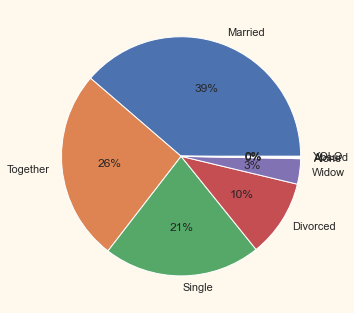

In [112]:
print("Contagem por tipo de estado civil:\n", data["Marital_Status"].value_counts(), "\n")
estado_civil = data["Marital_Status"].value_counts()
plt.pie(estado_civil, labels= estado_civil.index, autopct='%.0f%%')
plt.show()

Contagem por tipo de escolaridade:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


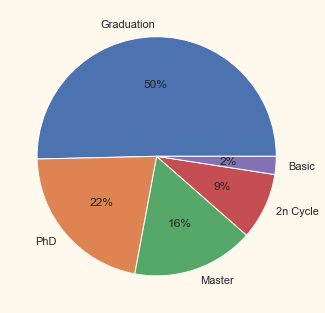

In [116]:
print("Contagem por tipo de escolaridade:\n", data["Education"].value_counts())
escolaridade = data["Education"].value_counts()
plt.pie(escolaridade, labels= escolaridade.index, autopct='%.0f%%')
plt.show()

**Ainda realizando a tratativa das variáveis, realizaremos as seguintes operações:**

* Calcular a **"Idade"** do cliente através do campo **"Year_Birth"**
* Criar uma nova variável **"Gastos"**  indicando o total gasto pelo cliente no supermercado durante os 2 anos.
* Criar uma nova variável **"Living_With"** através do campo **"Marital_Status"** para obter a indicação dos casais.
* Criar uma nova variável **"Children"** para indicar o total de criançcas na residência.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Remover algumas variáveis redundantes

In [117]:
#Feature Engineering

#Idade do cliente no dia de hoje 
data["Age"] = 2022-data["Year_Birth"]

#Total gasto em todas as compras de produtos
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Novo campo calculado a partir da situação do estao civil 
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Variável indicando o total de criançcas na família
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Variável com o total de membros da família
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmentação da escolaridade em 3 níveis
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Para melhor entendimento
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Eliminando as features redundantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Agora que temos novas variáveis, vamos dar uma olhada novamente nas informações gerais

In [118]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


Os valores acima mostram uma discrepância grande entre o salário mínimo (1730 dólares) e o salário máximo (666.666  dólares).

Note que a idade máxima é de 128 anos, conforme nosso cálculo do ano atual menos o ano de nascimento.
Vamos plotar algumas variáveis para ver o comportamento como um todo.

Visualizando algumas variáveis selecionadas


<Figure size 576x396 with 0 Axes>

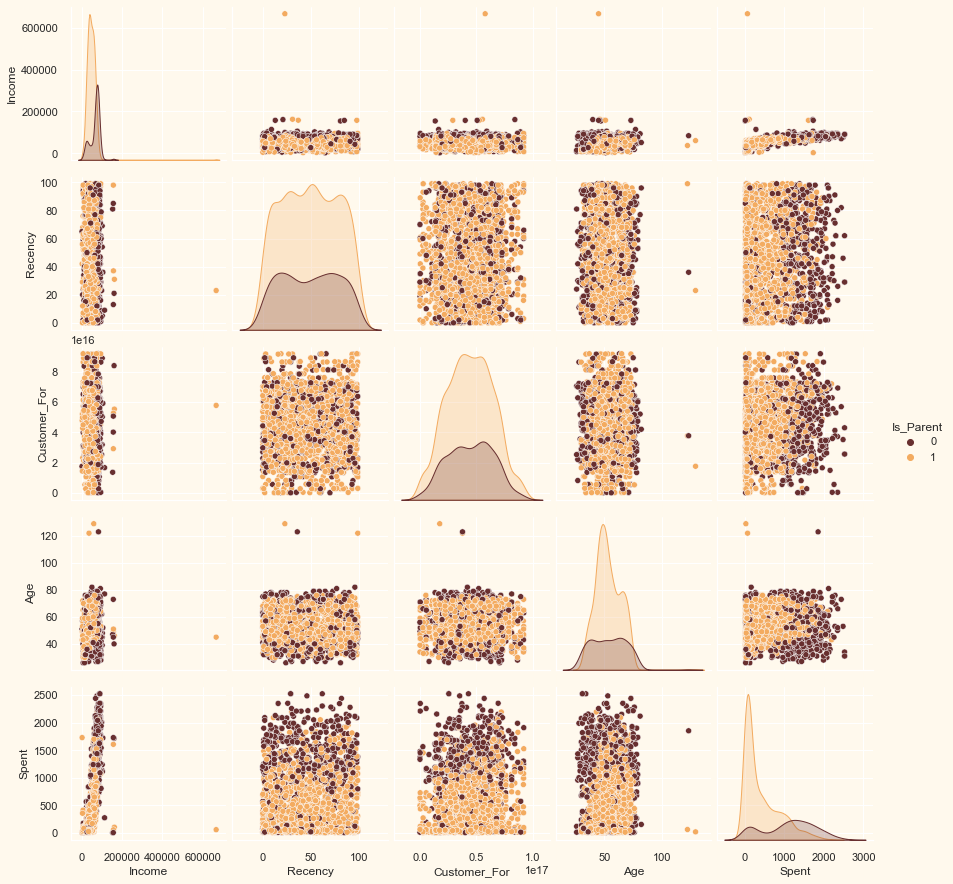

In [119]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Visualizando algumas variáveis selecionadas")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

#Mostrando a figura
plt.show()

Como se pode ver, há alguns outliers nas variáveis, como idade e salário. Portanto, vamos retirá-las. Há diversas formas de tratamento de outliers (medidas estatísticas, etc). Aqui o caso é bem simples e vamos apenas fazer um filtro no dataset.

In [120]:
#Dropping the outliers by setting a cap on Age and income. 
print("O total de registros antes da exclusão dos outliers é:", len(data))
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("O total de registros após a exclusão dos outliers é:", len(data))

O total de registros antes da exclusão dos outliers é: 2216
O total de registros após a exclusão dos outliers é: 2212


Vamos agora dar uma olhada na correlação entre as variáveis, sem considerar as variáveis categóricas.

<AxesSubplot:>

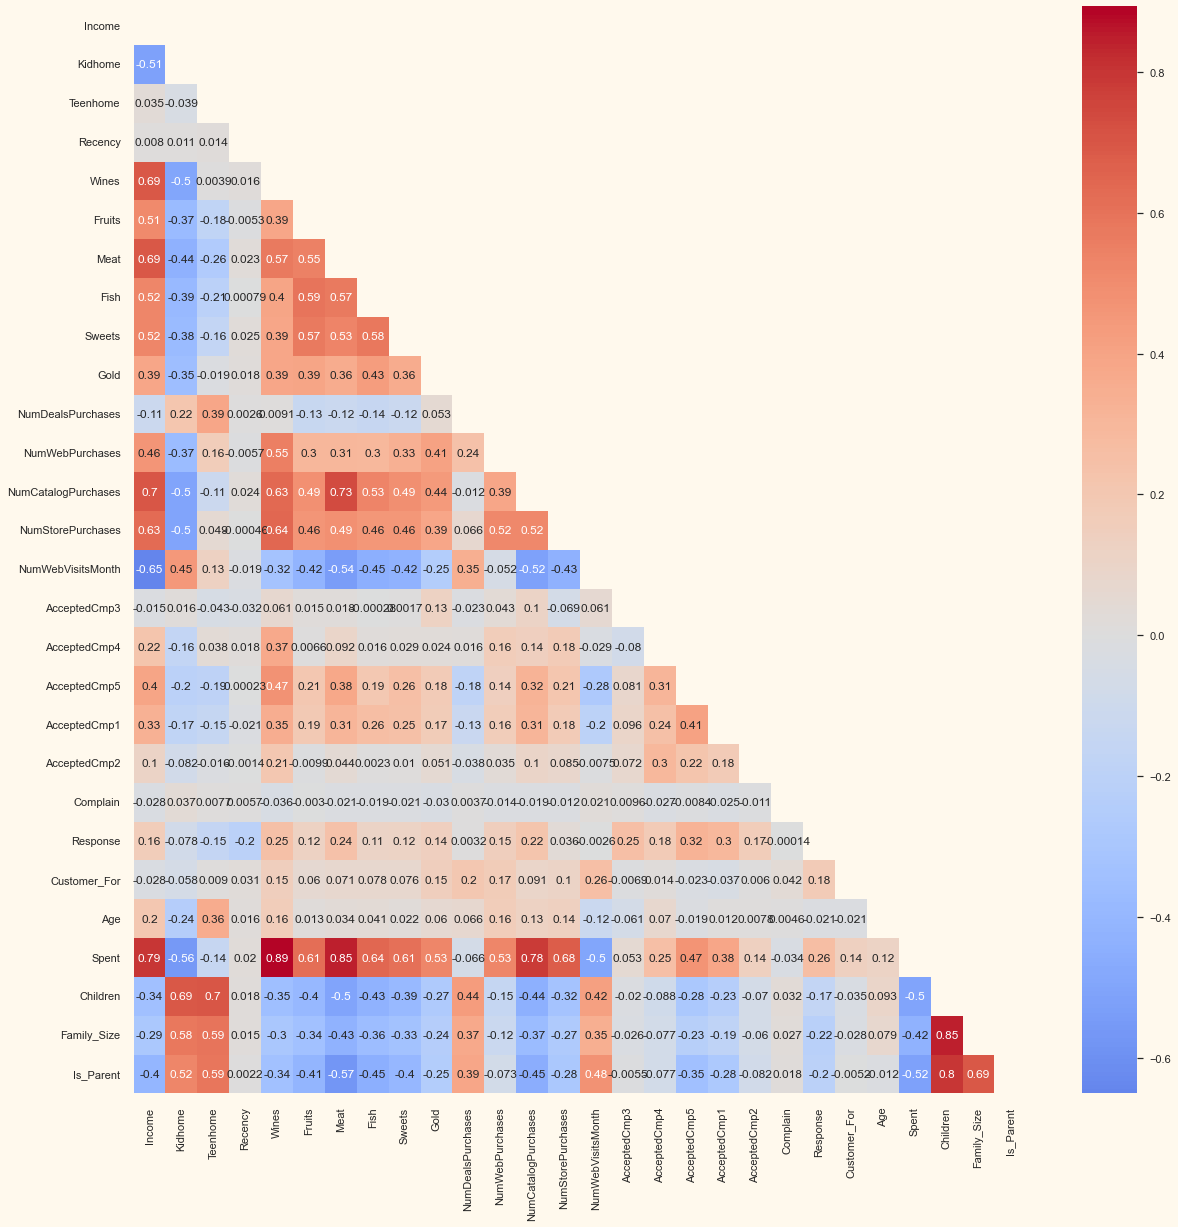

In [123]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
metade = np.triu(data.corr())
sns.heatmap(corrmat,annot=True, cmap='coolwarm', center=0, mask=metade)


<a id="4"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">4. Pré-processamento dos Dados</p>

Nessa seção vamos pré-processar os dados para prepará-los para a clusterização

**Realizaremos as seguintes operações na etapa de pré-processamento dos dados:**

* "LabelEncoder" das variáveis categóricas: para transformar nomes em números. Ex: (diretor: 0, analista: 1, gerente: 2, programador: 3 e fundador: 4) 
* Escala das variáveis com "Standard scaler". Exemplo: renda e idade estão em uma escala bem diferente e isto pode causar um grande problema no treino do nosso modelo uma vez o salário por possuir uma escala muito maior que a idade terá uma influência consequentemente muito maior no resultado. 
* Creating a subset dataframe for dimensionality reduction

Link interessante sobre encoder, scaling, etc: https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1

#### Tratamento das variáveis categóricas

In [31]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variáveis categóricas no dataset", object_cols)

Categorical variables in the dataset: []


In [32]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


#### Escala das variáveis

Muitos algoritmos de aprendizado de máquina têm melhor desempenho quando as variáveis ​​de entrada numéricas são dimensionadas para um intervalo padrão. 

As duas técnicas mais populares para dimensionar dados numéricos antes da modelagem são normalização e padronização. Normalização dimensiona cada variável de entrada separadamente para o intervalo 0-1, que é o intervalo para valores de ponto flutuante onde temos mais precisão. Estandardização dimensiona cada variável de entrada separadamente subtraindo a média (chamada centralização) e dividindo pelo desvio padrão para deslocar a distribuição para ter uma média de zero e um desvio padrão de um.

In [21]:
#Criando uma cópia dos dados
ds = data.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler() #valor = (valor — média) / desvioPadão
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [33]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [125]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,65,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,68,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,57,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,38,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,41,422,Partner,1,3,1


In [129]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.064195,0.013562,0.009042,0.150542,4.424926e+16,53.086347,607.268083,0.947559,2.593128,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.245156,0.115691,0.094678,0.357683,2.009245e+16,11.701599,602.513364,0.749466,0.906236,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,397.000000,1.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,82.000000,2525.000000,3.000000,5.000000,1.000000


<a id="5"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">5. Redução de Dimensionalidade</p>
Neste problema, existem muitos fatores /características com base nos quais a classificação final será feita. Esses fatores são basicamente atributos ou variáveis. Quanto maior o número de recursos, mais difícil é de se trabalhar com o problema. 

Muitas dessas variáveis estão correlacionadas e, portanto, são redundantes. É por isso que é recomendada a redução de dimensionalidade nos recursos selecionados antes de colocá-los em um estimador. Assim, *redução de dimensionalidade é o processo de redução do número de variáveis aleatórias em consideração, obtendo um conjunto de variáveis principais.*

**Principal component analysis (PCA)** é uma das técnicas para a redução de dimensionalidade de datasets, incrementando a interpretabilidade dos dados mas ao mesmo tempo minimizando a perda de informação. Adicionalmente, o PCA nada mais é que uma técnica a qual transforma atributos com uma certa correlação em um único atributo. O PCA deve ser aplicado apenas em casos em que o seu dataset possui muitas colunas, realmente um número muito grande e o treino do seu modelo acaba por ser muito demorado ou inviável devido ao alto número de colunas.

**Operações a serem realizadas nessa etapa:**
* Redução de dimensionalidade com PCA
* Plotar o dataset reduzido após a seleção das variáveis

**Redução de dimensionalidade com PCA**

Para esse projeto, reduziremos para 3 dimensões.

In [145]:
#Inicializando o PCA com 3 componentes
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-8.452150e-17,-7.629019e-18,4.517182e-17
std,2.878377e+00,1.706839e+00,1.221953e+00
min,-5.969392e+00,-4.312152e+00,-3.530070e+00
25%,-2.538494e+00,-1.328320e+00,-8.282909e-01
50%,-7.804204e-01,-1.581587e-01,-2.324623e-02
75%,2.383290e+00,1.242295e+00,8.000436e-01
max,7.444305e+00,6.142659e+00,6.605811e+00


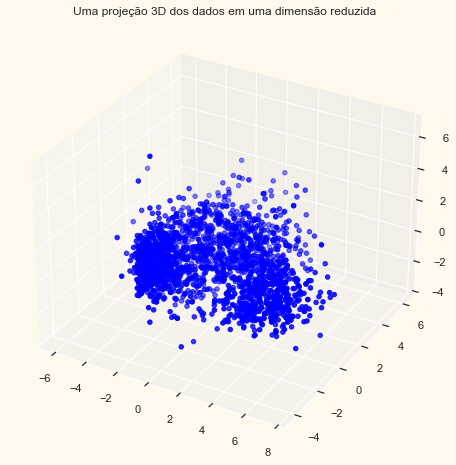

In [146]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("Uma projeção 3D dos dados em uma dimensão reduzida")
plt.show()

<a id="6"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">6. Clusterização</p>

Agora que temos a dimensão reduzida para 3 atributos, iremos realizar a clusterização utilizando a técnica de cluster aglomerativo. "Agglomerative Clustering" é um método de clusterização hierárquica. Envolve exemplos de agrupamento até o número de clusters apropriado ser encontrado. 

**Passos envolvidos na clusterização:**
* Método Elbow para determinar o número de clusters a serem formados
* Clusterização utilizando o "Agglomerative Clustering"
* Examinar os clusters através de visualização gráfica

Método Elbow para determinar o número de clusters a serem formados


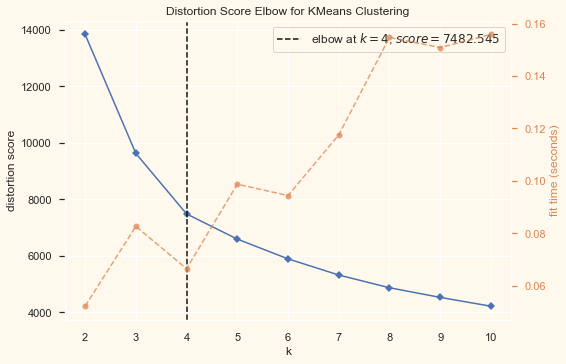

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Método Elbow para determinar o número de clusters a serem formados')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

O gráfico acima indica que 4 é o número ótimo de clusters para os nossos dados.
A seguir, vamos fazer o fit de Agglomerative Clustering para obter os clusters finais. 

In [154]:
#Inicilizando o modelo Agglomerative Clustering  
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters. 

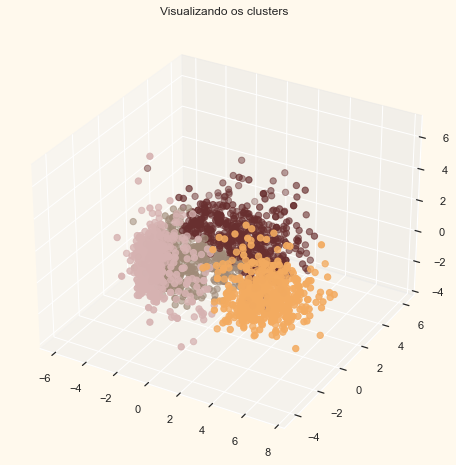

In [155]:
#Plotando os clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Visualizando os clusters")
plt.show()

<a id="7"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">7. Avaliação do Modelo</p>

Uma vez que este é um algoritmo não supervisionado, não temos uma variável target marcada para avaliar ou pontuar o modelo. O objetivo desta seção é estudar os padrões nos clusters formados e determinar a natureza dos padrões dos clusters.

Para isso, analisaremos os dados dos clusters por meio de análise exploratória de dados e assim tirar algumas conclusões.

**Primeiramente, vamos ver a distribuição do grupo de clusters**

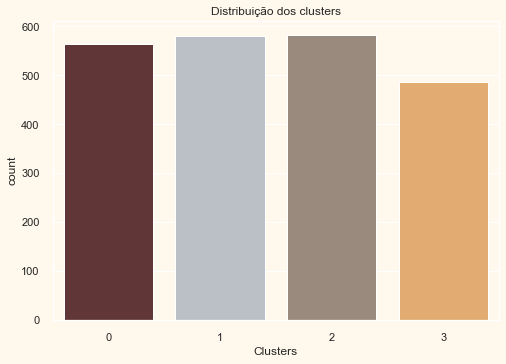

In [160]:
#Plotando os registros de cada cluster
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribuição dos clusters")
plt.show()

Os clusters parecem estar distribuídos de forma bastante uniforme.

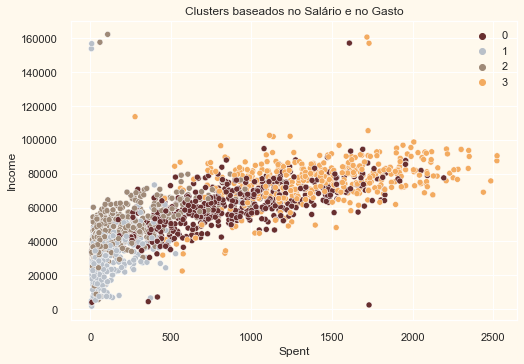

In [163]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Clusters baseados no Salário e no Gasto")
plt.legend()
plt.show()

**Salário vs Gastos mostra pra gente os seguintes padrões**
* Grupo 0: Alto Gasto & Médio Salário
* Grupo 1: Baixo Gasto & Baixo Salário
* Grupo 2: Baixo Gasto & Médio Salário
* Grupo 3: Algo Gasto & Alto Salário  

A seguir, iremos analisar em detalhes a distruição dos clusters pelos vários tipos de produts vendidos: vinhos, frutas, carne, peixe, doces e ouro.

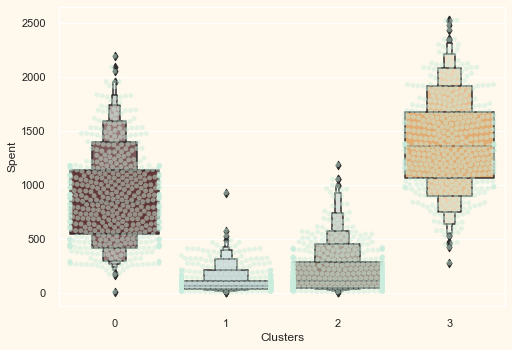

In [162]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

Analisando o gráfico acima, pode-se ver claramente que o cluster 1 é o nosso maior conjunto de clientes, seguido de perto pelo cluster 0. Agora vamos explorar uma parte muito importante do projeto, que é o que cada cluster está gastando nas estratégias de marketing direcionadas.

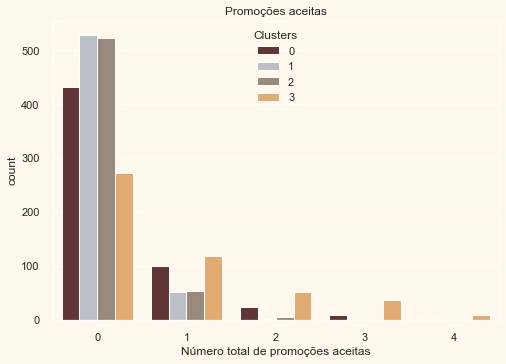

In [164]:
#Criando uma variável que é a soma de todas as promoções aceitas
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

#Plotando os dados das campanhas
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Promoções aceitas")
pl.set_xlabel("Número total de promoções aceitas")
plt.show()

Não houve uma resposta esmagadora relacionado às campanhas. Muito poucos participantes no geral. Além disso, nenhum cluster participou de todas as 5 campanhas. Talvez sejam necessárias campanhas mais bem direcionadas e bem planejadas para aumentar as vendas.


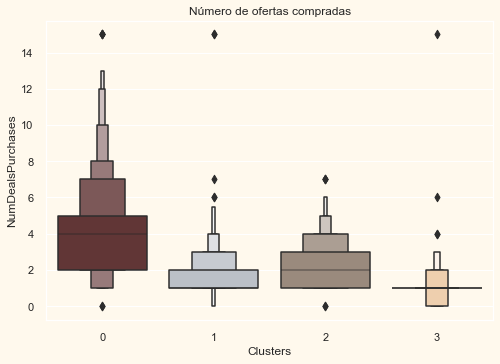

In [166]:
#Plotando o número de ofertas compradas
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Número de ofertas compradas")
plt.show()

Ao contrário das campanhas, as ofertas oferecidas tiveram boa conversão. Tem melhor resultado o cluster 0 e o cluster 3.
No entanto, nosso cluster 1 de clientes "estrelas" não está muito interessado em ofertas.
Nada parece atrair o cluster 2.


<Figure size 576x396 with 0 Axes>

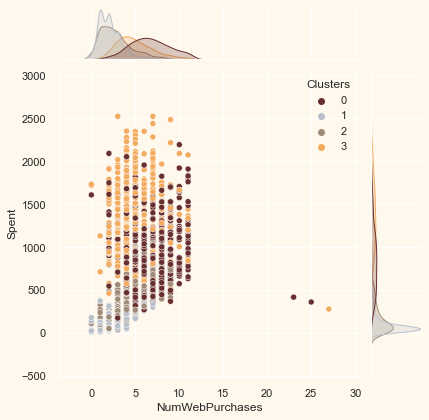

<Figure size 576x396 with 0 Axes>

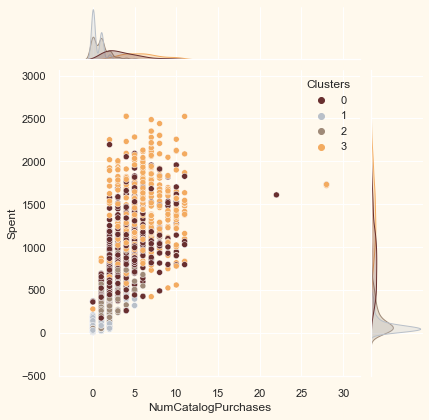

<Figure size 576x396 with 0 Axes>

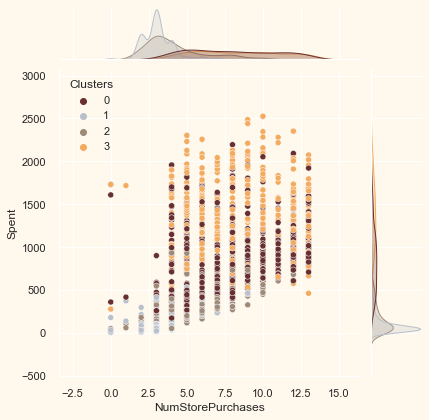

<Figure size 576x396 with 0 Axes>

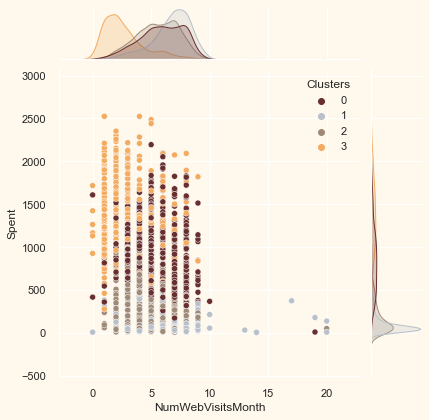

In [167]:
# Verificar os detalhes das compras realizadas
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

<a id="8"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">8. Análise dos Resultados e Tomada de Decisão</p>

Agora que formamos os clusters e analisamos seus hábitos de compra, vamos ver quem são todos esses clusters. Para isso, vamos traçar o perfil dos clusters formados e chegar a uma conclusão sobre quem é nosso cliente estrela e quem precisa de mais atenção da equipe de marketing da loja.

Para decidir sobre, vamos plotar alguns gráficos que são indicativos das características pessoais do cliente à luz do cluster em que ele está. Com base nos resultados, chegarei às conclusões.

<Figure size 576x396 with 0 Axes>

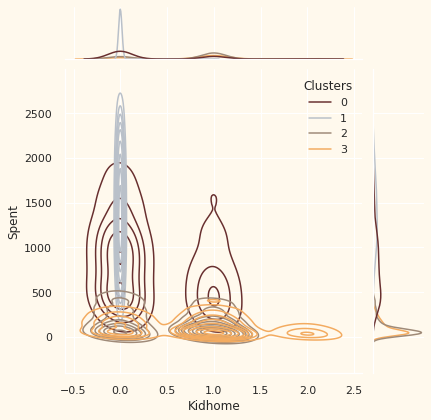

<Figure size 576x396 with 0 Axes>

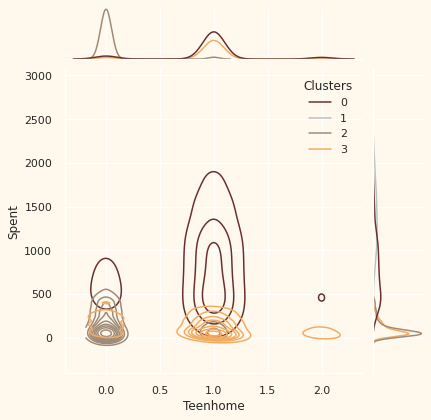

<Figure size 576x396 with 0 Axes>

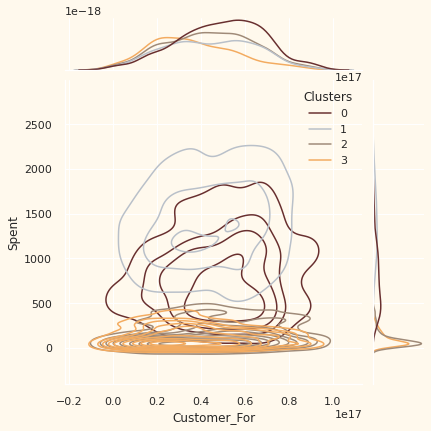

<Figure size 576x396 with 0 Axes>

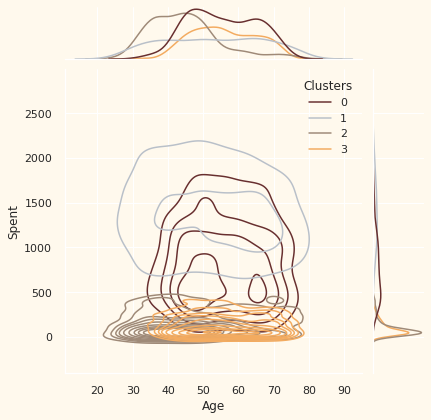

<Figure size 576x396 with 0 Axes>

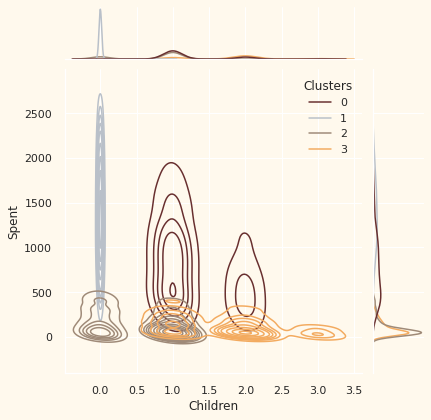

<Figure size 576x396 with 0 Axes>

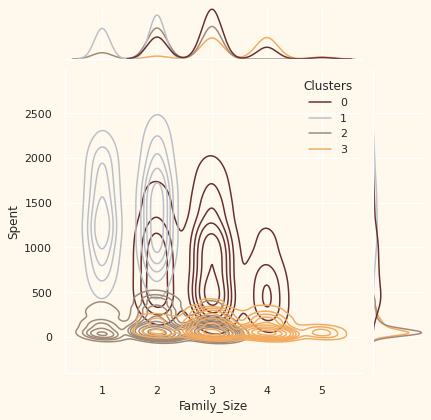

<Figure size 576x396 with 0 Axes>

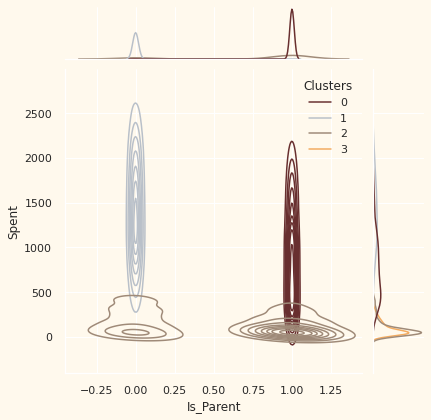

<Figure size 576x396 with 0 Axes>

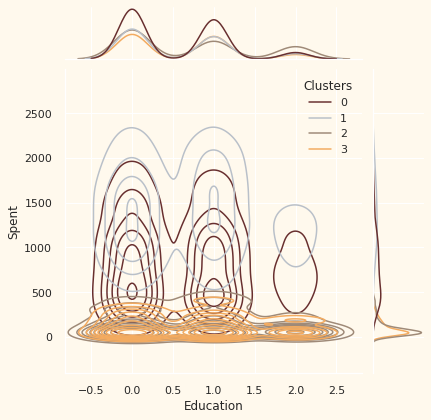

<Figure size 576x396 with 0 Axes>

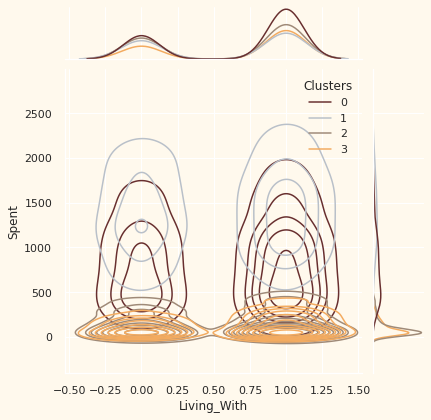

In [29]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


**Análise e Tomada de Decisão:**

As informações a seguir podem ser deduzidas sobre os clientes nos diferentes clusters.

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation%20(3).png?raw=true">
  

<a id="9"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">9. Conclusão</p>


Neste projeto, realizamos um agrupamento não supervisionado. Fizemos várias operações incluindo redução de dimensionalidade seguida de agrupamento aglomerativo. Criamos 4 clusters e os usamos ainda mais na criação de perfis de clientes em clusters de acordo com suas estruturas familiares e renda/gastos.
Isso pode ser usado no planejamento de melhores estratégias de marketing.

<a id="10"></a>
# <p style="background-color:#000080;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Fim</p>